### Import Packages 

In [12]:
import numpy as np
import pandas as pd
from prettytable import PrettyTable
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
# from matplotlib import colors
# from matplotlib.ticker import PercentFormatter

### Load Data

In [13]:
DataSet_Path = r"C:\Users\asus\Desktop\MAHDI,Central\Programming\github\Repositories\AI\7- RFM\Train.xlsx"
Sales_DataSet = pd.read_excel(DataSet_Path)
Sales_DataSet = Sales_DataSet.iloc[:,:5] # ignore 'Suspicious' column
Sales_DataSet.head()

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue
0,Rep10101,C21116,PR6112,182,1665
1,Rep10102,C21116,PR6112,182,1740
2,Rep10103,C21116,PR6253,101,1040
3,Rep10104,C21116,PR6253,283,4495
4,Rep10105,C21116,PR6294,108,1465


### Unique Value

In [14]:
unique_counts = PrettyTable()
unique_counts.field_names = ["Feature", "Unique Value"]

for column in Sales_DataSet.columns:
    count = Sales_DataSet[column].nunique()
    unique_counts.add_row([column, count])


print(unique_counts)    


+-----------------+--------------+
|     Feature     | Unique Value |
+-----------------+--------------+
|     ReportID    |    42582     |
|  SalesPersonID  |     992      |
|    ProductID    |     593      |
|     Quantity    |     6493     |
| TotalSalesValue |     7665     |
+-----------------+--------------+


### Sellers per Quantity
    - Total number of sales of a particular Seller
    - Ranking the Sellers, and show top 10 of them in bar chart

1829
{'C21116': 1829, 'C21918': 8660, 'C22276': 18885, 'C21820': 793933, 'C21976': 154931, 'C21829': 532459, 'C22243': 196037, 'C21135': 189041, 'C22184': 254938, 'C22190': 226368, 'C21146': 65042, 'C21132': 13918, 'C21284': 4168, 'C22008': 1597, 'C22126': 224249, 'C21535': 144242, 'C21167': 72125, 'C22085': 2039, 'C22239': 10105, 'C22049': 42201, 'C22042': 13945, 'C21327': 848, 'C22209': 284307, 'C21221': 13026, 'C21898': 121022, 'C21991': 13440, 'C21865': 21018, 'C22336': 60374, 'C22315': 151961, 'C21283': 68422, 'C22058': 379602, 'C22320': 24019, 'C21186': 577358, 'C22000': 6831, 'C22230': 108385, 'C22117': 121558, 'C22044': 216964, 'C21885': 30322, 'C22037': 117595, 'C21884': 162108, 'C22068': 50848, 'C22319': 223024, 'C22199': 60615, 'C22325': 16053, 'C22200': 555363, 'C22185': 1173587, 'C21848': 31235, 'C22030': 5525254, 'C21845': 38954, 'C22122': 68799, 'C22215': 89268, 'C22198': 39812, 'C22197': 1095771, 'C22196': 751733, 'C21824': 545397, 'C22327': 1039263, 'C22328': 163435, '

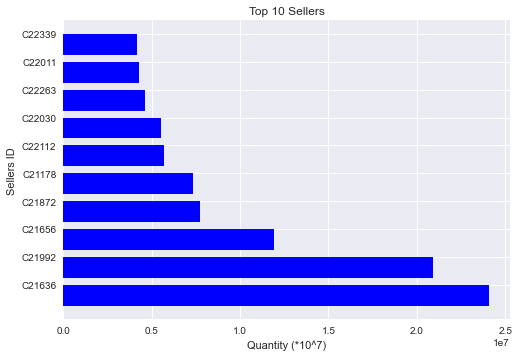

In [15]:

salesPerson_unique = list(Sales_DataSet.SalesPersonID.unique())

SalesPersonID_per_Quantity = Sales_DataSet[["Quantity", "SalesPersonID"]]


QuantitySum_unique_forEachSalesPerson = []
for Person in salesPerson_unique:
        
    ListOfQuantityOfPerson = SalesPersonID_per_Quantity["Quantity"][(SalesPersonID_per_Quantity["SalesPersonID"]==Person)]
    
    QuantitySum_unique_forEachSalesPerson.append(sum(ListOfQuantityOfPerson))
    
    
    
# Total number of sales of a particular Seller
SellerID = "C21116" 
UniqueSalesPersonID_per_SumOfQuantity = dict(zip(salesPerson_unique, QuantitySum_unique_forEachSalesPerson))
print(UniqueSalesPersonID_per_SumOfQuantity[SellerID])


print(UniqueSalesPersonID_per_SumOfQuantity)

# Ranking of Sellers
Top10_Sellers = sorted(UniqueSalesPersonID_per_SumOfQuantity.items(), key=lambda user:user[1], reverse=True)[:10]
SellersPerQuantity_keys, SellersPerQuantity_values = [ i for i, j in Top10_Sellers], [ j for i, j in Top10_Sellers]

# print(SellersPerQuantity_values[:10])

fig, ax = plt.subplots()    
plt.style.use('seaborn')
width = 0.75 
ind = np.arange(len(SellersPerQuantity_values))
ax.barh(ind, SellersPerQuantity_values, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(SellersPerQuantity_keys, minor=False)
plt.title('Top 10 Sellers')
plt.xlabel('Quantity (*10^7)')
plt.ylabel('Sellers ID')
plt.show()



### 

### Most Popular Products

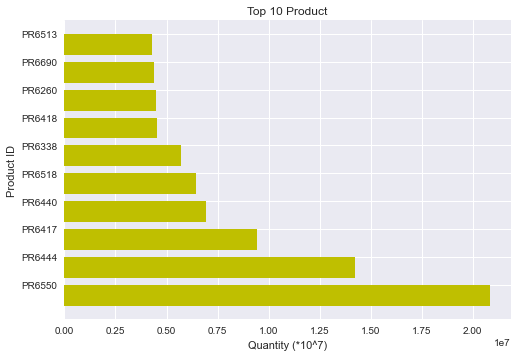

In [16]:
ProductID_unique = list(Sales_DataSet.ProductID.unique())

ProductID_per_Quantity = Sales_DataSet[["Quantity", "ProductID"]]


QuantitySum_unique_forEachProductID = []
for Product in ProductID_unique:
        
    ListOfQuantityOfProduct = ProductID_per_Quantity["Quantity"][(ProductID_per_Quantity["ProductID"]==Product)]
    
    QuantitySum_unique_forEachProductID.append(sum(ListOfQuantityOfProduct))
        
    
# Total number of sales of a particular Product
ProductID = "PR6112" 
UniqueProduct_per_SumOfQuantity = dict(zip(ProductID_unique, QuantitySum_unique_forEachProductID))
# print(UniqueProduct_per_SumOfQuantity[ProductID])



# Ranking of Sellers
Top10_Product = sorted(UniqueProduct_per_SumOfQuantity.items(), key=lambda product:product[1], reverse=True)[:10]
MostPopularProducts_keys, MostPopularProducts_values = [ i for i, j in Top10_Product], [ j for i, j in Top10_Product]

fig, ax = plt.subplots()    
plt.style.use('seaborn')
width = 0.75 
ind = np.arange(len(MostPopularProducts_values))
ax.barh(ind, MostPopularProducts_values, width, color="y")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(MostPopularProducts_keys, minor=False)
plt.title('Top 10 Product')
plt.xlabel('Quantity (*10^7)')
plt.ylabel('Product ID')
plt.show()



### Most Trend Buying Number (NOT COMPLITED)

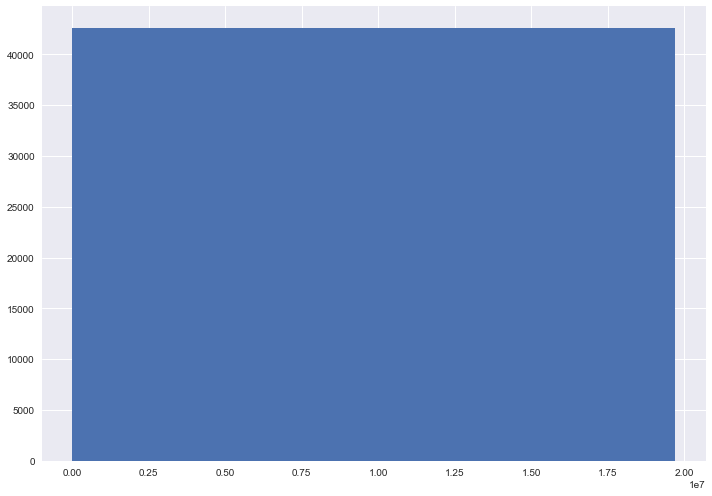

In [17]:

# y = .8 ** x + np.random.randn(10000) + 25

fig, axs = plt.subplots(1, 1,
						figsize =(10, 7),
						tight_layout = True)

n_bins = 1
axs.hist(Sales_DataSet["Quantity"], bins = n_bins)

# Show plot
plt.show()


### Number of product selling by seller

10


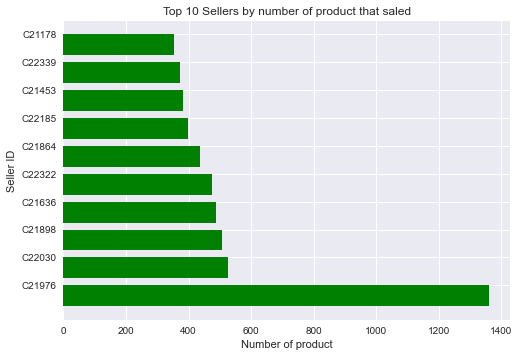

In [18]:
salesPerson_unique = list(Sales_DataSet.SalesPersonID.unique())

QuantityCount_unique_forEachSalesPerson = []
for Person in salesPerson_unique:
        
    ListOfQuantityCountOfPerson = SalesPersonID_per_Quantity["Quantity"][(SalesPersonID_per_Quantity["SalesPersonID"]==Person)]
    
    QuantityCount_unique_forEachSalesPerson.append(len(ListOfQuantityCountOfPerson))
    

# print(QuantityCount_unique_forEachSalesPerson)






# Number of product selling by particular seller
SellerID = "C21116" 
UniqueSalesPersonID_per_CountOfQuantity = dict(zip(salesPerson_unique, QuantityCount_unique_forEachSalesPerson))
print(UniqueSalesPersonID_per_CountOfQuantity[SellerID])




# Ranking of Sellers by number of product that saled
Top10_Sellers = sorted(UniqueSalesPersonID_per_CountOfQuantity.items(), key=lambda user:user[1], reverse=True)[:10]
NumberOfProduct_keys, NumberOfProduct_values = [ i for i, j in Top10_Sellers], [ j for i, j in Top10_Sellers]

fig, ax = plt.subplots()    
plt.style.use('seaborn')
width = 0.75 
ind = np.arange(len(NumberOfProduct_values))
ax.barh(ind, NumberOfProduct_values, width, color="Green")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(NumberOfProduct_keys, minor=False)
plt.title('Top 10 Sellers by number of product that saled')
plt.xlabel('Number of product')
plt.ylabel('Seller ID')
plt.show()


### Clustering and get sellers into group
    - 3 cluster for KMeans and 2 cluster for outlier, 5 cluster in total
        - first outliar cluster : x>IQR
        - secend outliar cluster : x>IQR+Q3

In [19]:
def getOut_Outliar_Cluster4_Cluster5(Data, ColumnIndex): # output -> ReducedDataSet, Cluster4, CLuster5
    Data = pd.DataFrame(Data) if type(Data)==list  else None
    Q1 = Data[ColumnIndex].describe()["25%"]
    Q3 = Data[ColumnIndex].describe()["75%"]
    IQR = Q3 - Q1
    
    outliers_withIndex_Cluster4 = dict()     
    outliers_withIndex_Cluster5 = dict()     

    
    
    #Cluster 4
    index = 0
    for i in Data[ColumnIndex]:
        if int(i) > int(68028) and i < 139768:
            outliers_withIndex_Cluster4[index] = i
                        
        index += 1


    #Cluster 5
    index = 0
    for i in Data[ColumnIndex]:
        if int(i) > int(139768):
            outliers_withIndex_Cluster5[index] = i
                        
        index += 1
    
    #ReducedDataSet with out outliar
    QuantitySum_unique_forEachSalesPerson_withOutOutliar = Data
    Cluster4_outliarIndexes = list(outliers_withIndex_Cluster4.keys())
    Cluster5_outliarIndexes = list(outliers_withIndex_Cluster5.keys())
    allIndexesOfoutliars = Cluster4_outliarIndexes + Cluster5_outliarIndexes

    QuantitySum_unique_forEachSalesPerson_withOutOutliar = np.delete(np.array(QuantitySum_unique_forEachSalesPerson_withOutOutliar), allIndexesOfoutliars)
    
    return (QuantitySum_unique_forEachSalesPerson_withOutOutliar), outliers_withIndex_Cluster4, outliers_withIndex_Cluster5
    
    


def NumberOfEachLabel(Model_labels) -> dict:
    
    keys = ("1", "2", "3")
    value = 0
    
    res = dict.fromkeys(keys, value)    
    
    for i in Model_labels:
        if i == 0 : res["1"] += 1
        
        elif i == 1 :res["2"] += 1
        
        elif i == 2 :res["3"] += 1
    
    return res




ReducedDataSet, Cluster4, Cluster5 = getOut_Outliar_Cluster4_Cluster5(QuantitySum_unique_forEachSalesPerson, 0)


model = KMeans(n_clusters=3)
model = model.fit(scale(ReducedDataSet).reshape(-1,1))
# print(model.labels_)

print(NumberOfEachLabel(model.labels_)) #1, 2, 3
print(len(Cluster4)) # 4
print(len(Cluster5)) # 5



{'1': 481, '2': 85, '3': 172}
99
155


In [26]:
ReducedDataSet = np.array(ReducedDataSet)

CompleteDataSet = np.zeros(992)

index_balancer = 0
for i in range(len(CompleteDataSet)):
    if i in Cluster4.keys():
        pass
    
    elif i in Cluster5.keys():
        pass
    
    else:
        index_balancer += 1

    
    






a = np.array([1, 2, 4, 5])
a = np.insert(a, 2, 3)

{3: 793933, 4: 154931, 5: 532459, 6: 196037, 7: 189041, 8: 254938, 9: 226368, 14: 224249, 15: 144242, 22: 284307, 28: 151961, 30: 379602, 32: 577358, 36: 216964, 39: 162108, 41: 223024, 44: 555363, 45: 1173587, 47: 5525254, 52: 1095771, 53: 751733, 54: 545397, 55: 1039263, 56: 163435, 70: 150957, 71: 210110, 79: 1522305, 80: 310624, 83: 365177, 86: 528472, 89: 757003, 91: 427777, 96: 260230, 97: 247388, 104: 276102, 105: 235140, 106: 397861, 112: 302689, 114: 533774, 116: 473323, 118: 504176, 119: 7731866, 120: 310610, 127: 238814, 135: 4161173, 140: 454721, 149: 1669947, 151: 315903, 152: 1402230, 153: 7357299, 155: 2410331, 156: 224830, 172: 608732, 173: 231563, 175: 778034, 183: 151359, 195: 195650, 196: 390121, 201: 679884, 203: 373253, 212: 184795, 220: 207838, 223: 286425, 228: 165313, 244: 187169, 246: 4628186, 247: 164265, 250: 1560340, 252: 3978709, 253: 145507, 255: 427325, 257: 205489, 258: 401114, 260: 141479, 274: 1190393, 283: 223456, 284: 966939, 292: 389075, 294: 307052